In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Q1

In class, we assumed improper priors for $p(\theta)$ and $p(\tau)$ which gave us an easy form for the likelihood function. Based on this question, we take proper priors that are the full conditional posteriors dervied in class for $p(\theta|\tau,\textbf{x})$ *normal* and  $p(\tau|\theta,\textbf{x})$ *gamma*.

The following is the gibbs sampler for the given data:

In [2]:
n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)
C,G = 2,100  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 100  # initialization
for c in range(C):
    for g in range(1,G):
        tau[c,g] = stats.gamma(a=n/3, scale = 2/((x-theta[c,g-1])**2).sum()).rvs()
        theta[c,g] = stats.norm(x.mean(),scale = 1/(tau[c,g]*n)**0.5).rvs()

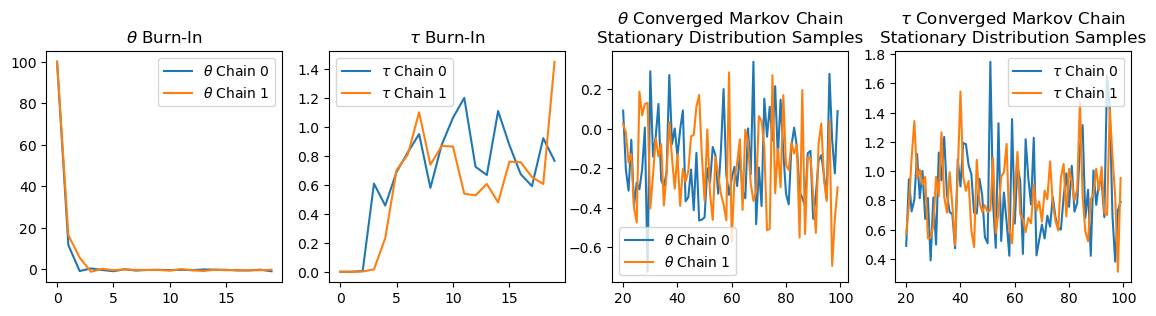

In [3]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 100
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();         

array([-0.72433435,  0.63757019])

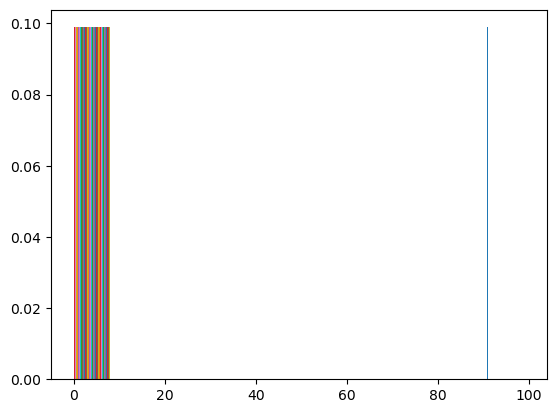

In [4]:
#Bayesian inference
plt.hist(theta, density = True)
np.quantile(theta, [0.025,0.975])

Based on this result we can say that the we are 97.5% confident that the true value of the parameter $\theta$ lies between -0.724 and 0.638.

## Q2

The following is the derviation for the full conditional distribution of Theta given our prior:

The general form of a normal density function is
$$f(\theta) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{1}{2\sigma^2} (\theta - \mu)^2 \right)$$

Now, we substitute \( \sigma^2 = \frac{1}{\tau_0} \), where \( \tau_0 \) is the precision. This gives us the prior:
$$f(\theta) = \frac{1}{\sqrt{2\pi \left( \frac{1}{\tau_0} \right)}} \exp\left( -\frac{1}{2 \left( \frac{1}{\tau_0} \right)} (\theta - \theta_0)^2 \right)$$

final form:

$$ f(\theta) = \sqrt{\frac{\tau_0}{2\pi}} \exp\left( -\frac{\tau_0}{2} (\theta - \theta_0)^2 \right)$$


We know from our result in class that, the full conditional posterior from a normal likelihood function would be the following:

$$ p(\theta | \\mathbf{x},\tau) =  e^{-\\frac{\\tau n+\\tau_0}{2}  \\left[ \\theta^2  - 2 \\theta \\left(\\frac{n\\bar x + \\frac{\\tau_0}{\\tau} \\theta_0}{ n+\\frac{\\tau_0}{\\tau}}\\right) \\right] } \\\\\$$

the corresponding posterior mean and posterior variance are the following:
$$\theta_{\text{post_mean}} = \frac{\tau_0 \theta_0 + \tau n \bar{x}}{\tau_0 + n \tau}$$

$$\sigma^2_{\text{post_variance}} = \frac{1}{\tau_0 + n \tau}$$


The following is the derivation for the full conditional distribution of Tau:

$$ P(\tau \mid \theta, x) = P(x \mid \tau, \theta) \cdot P(\tau)$$

$$P(\tau,  \mid \theta, x) = \prod_{i=1}^n \sqrt{\frac{\tau}{2\pi}} \cdot e^{-\frac{\tau}{2}(x_i - \theta)^2} 
\cdot \tau^{\frac{\alpha}{2}-1} \cdot e^{-\frac{\lambda}{2}\tau}$$


$$ = \tau^{\frac{n}{2}} \cdot e^{-\frac{\tau}{2} \sum_{i=1}^n (x_i - \theta)^2} 
\cdot \tau^{\frac{\alpha}{2} - 1} \cdot e^{-\frac{\lambda}{2} \tau}$$

$$P(\tau,  \mid \theta, x) = \tau^{\frac{\alpha}{2} + \frac{n}{2} - 1} \cdot e^{-\frac{\tau}{2} \left( \sum_{i=1}^n (x_i - \theta)^2 + \beta \right)}$$

$$ P(\tau,  \mid \theta, x) = \text{Gamma} \left( \frac{\alpha + n}{2}, \frac{\sum_{i=1}^n (x_i - \theta)^2 + \lambda}{2} \right)$$


Plotting the full conditional posterior distributions

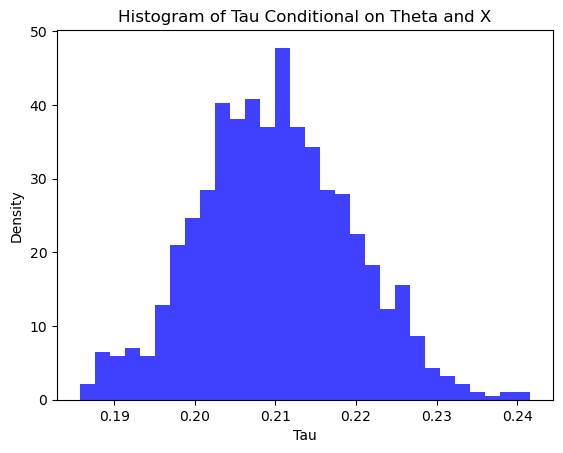

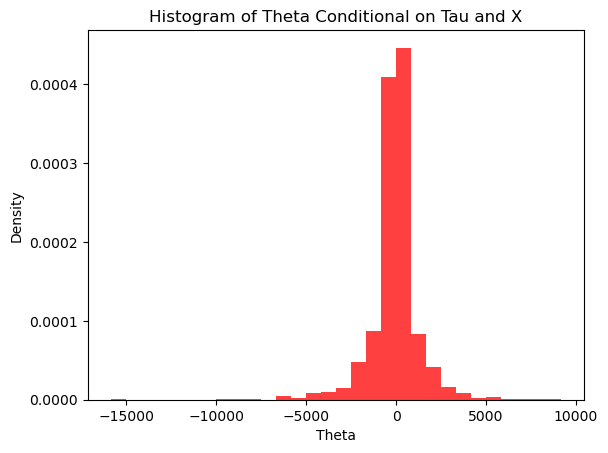

In [5]:
n = 1000
x_samples = stats.norm(loc=0, scale=1).rvs(size=n)

alpha = 2
lambd = 2

theta_not = 2
tau_not = 2

tau_samples = stats.gamma(a=alpha/2, scale = 2/lambd).rvs(size=n)
theta_samples = stats.norm(loc = theta_not, scale = tau_not^2).rvs(size=n)


#full conditional for theta
theta_conditional = []
for tau in tau_samples:
    theta_conditional.extend(stats.norm(loc=(tau*n*np.average(x) + tau_not*theta_not)/(n*tau + tau_not), scale=(n*tau+tau_not)).rvs(size=1))
    



#full conditional for Tau

square_sum = 0
for i in range(n):
    square_sum += (x_samples[i]-theta_samples[i])**2

tau_conditional = []
for theta in theta_samples:
        tau_conditional.extend(stats.gamma(a = (alpha+n)/2, scale = 2/((square_sum + lambd))).rvs(1))


plt.hist(tau_conditional, bins=30, density=True, alpha=0.75, color='blue')
plt.xlabel('Tau')
plt.ylabel('Density')
plt.title('Histogram of Tau Conditional on Theta and X')
plt.show()
#np.quantile([0.025,0.975])


plt.hist(theta_conditional, bins=30, density=True, alpha=0.75, color='red')
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Histogram of Theta Conditional on Tau and X')
plt.show()
#np.quantile([0.025,0.975])

We will determine the influence of the hyperparameters alpha and lambda on the relative contribution of the Tau prior to the posterior. This will be done by observing the impact of changing the hyperparameter values on the posterior mean. 

The posterior mean:
$$ posterior mean = \frac{\alpha + n}{\sum_{i=1}^n (x_i - \theta)^2 + \lambda} $$

In [12]:
tau_posterior_mean = []

for alpha in range(1,11):
    lambd = 2
    n = 30
    tau_posterior_mean.append(((alpha+n)/(square_sum + lambd)))
    
df_1 = pd.DataFrame({'alphas' : [1,2,3,4,5,6,7,8,9,10], 'posterior_mean' : tau_posterior_mean})


tau_posterior_mean_2 = []

for alpha in range(1,11):
    lambd = 2
    n = 15
    tau_posterior_mean_2.append(((alpha+n)/(square_sum + lambd)))
    
df_2 = pd.DataFrame({'alphas' : [1,2,3,4,5,6,7,8,9,10], 'posterior_mean' : tau_posterior_mean_2})

tau_posterior_mean_3 = []

for alpha in range(1,11):
    lambd = 2
    n = 5
    tau_posterior_mean_3.append(((alpha+n)/(square_sum + lambd)))
    
df_3 = pd.DataFrame({'alphas' : [1,2,3,4,5,6,7,8,9,10], 'posterior_mean' : tau_posterior_mean_3})



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'posterior mean of full conditional Tau distribution and alpha hyperparameter (n = 30,15,5) ')

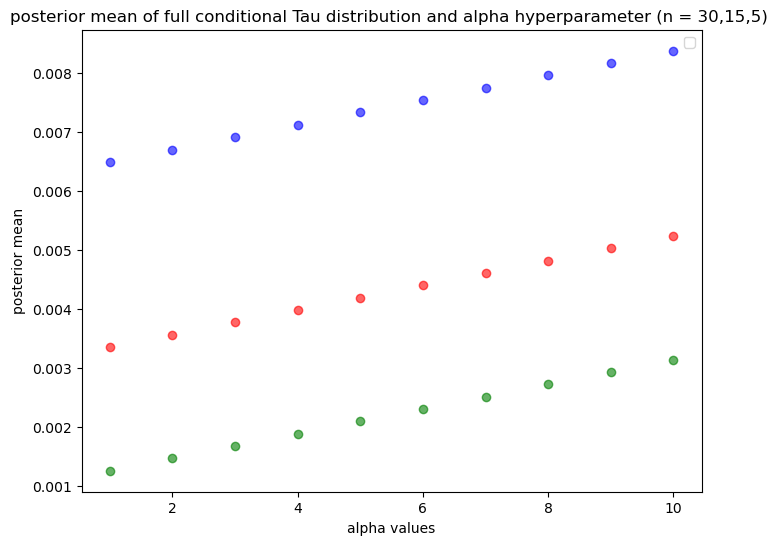

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df_1['alphas'],df_1['posterior_mean'], color = 'blue', alpha = 0.6)
plt.scatter(df_2['alphas'],df_2['posterior_mean'], color = 'red', alpha = 0.6)
plt.scatter(df_3['alphas'],df_3['posterior_mean'], color = 'green', alpha = 0.6)
plt.legend()
plt.ylabel('posterior mean')
plt.xlabel('alpha values')
plt.title('posterior mean of full conditional Tau distribution and alpha hyperparameter (n = 30,15,5) ')

We can see, that as alpha increases so does our posterior mean. This is an indication of the contribution that the alpha count of the prior has on our posterior distribution. When we vary the value of 'n' between 30, 15, and 5 we see the posterior mean shifting vertically down. What's interesting is that the degree of the vertical shift seems to be greater than the max-min of the posterior means for each value of n. this implies that the number of observations from our likelihood data likely has a greater influence on posterior mean relative to our alpha count. 

This is possible since alpha values generally fall between 0.1 to 10 as an upper bound. Thus, it seems like the likelihood is somewhat dominating the prior. 

In [14]:
tau_posterior_mean = []

for lambd in range(1,11):
    alpha = 2
    n = 30
    tau_posterior_mean.append(((alpha+n)/(square_sum + lambd)))
    
df_1 = pd.DataFrame({'lambdas' : [1,2,3,4,5,6,7,8,9,10], 'posterior_mean' : tau_posterior_mean})


tau_posterior_mean_2 = []

for lamd in range(1,11):
    alpha = 2
    n = 15
    tau_posterior_mean_2.append(((alpha+n)/(square_sum + lambd)))
    
df_2 = pd.DataFrame({'lambdas' : [1,2,3,4,5,6,7,8,9,10], 'posterior_mean' : tau_posterior_mean_2})

tau_posterior_mean_3 = []

for lambd in range(1,11):
    alpha = 2
    n = 5
    tau_posterior_mean_3.append(((alpha+n)/(square_sum + lambd)))
    
df_3 = pd.DataFrame({'lambdas' : [1,2,3,4,5,6,7,8,9,10], 'posterior_mean' : tau_posterior_mean_3})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'posterior mean of full conditional Tau distribution and lambda hyperparameter (n = 30,15,5)')

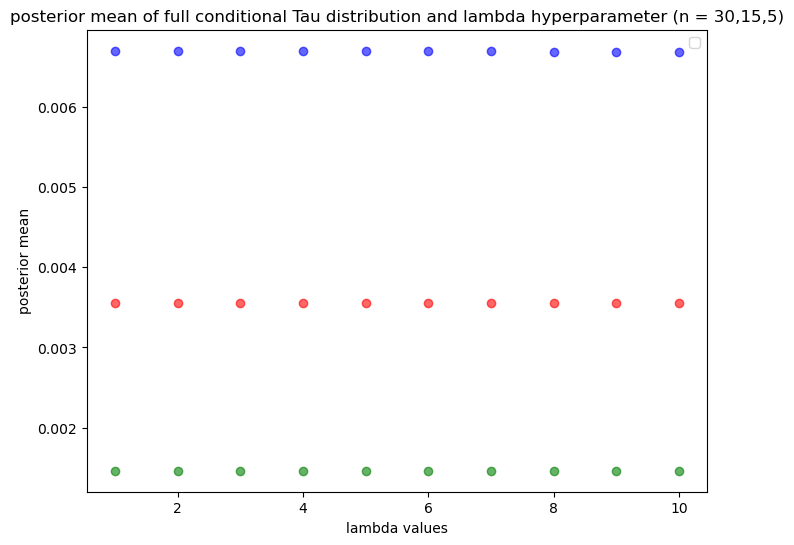

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(df_1['lambdas'],df_1['posterior_mean'], color = 'blue', alpha = 0.6)
plt.scatter(df_2['lambdas'],df_2['posterior_mean'], color = 'red', alpha = 0.6)
plt.scatter(df_3['lambdas'],df_3['posterior_mean'], color = 'green', alpha = 0.6)
plt.legend()
plt.ylabel('posterior mean')
plt.xlabel('lambda values')
plt.title('posterior mean of full conditional Tau distribution and lambda hyperparameter (n = 30,15,5)')

With respect to lambda, again we see that as lambda increases the posterior mean decreases. The rate of decrease is lesser relative to the rate of increase when alpha increased by a unit. This hints at the impact of lambda being relatively lesser than alpha. Moreover, as we vary n from 30 to 5, it induces a large vertical shift in posterior mean. Here, the vertical shift is far more than the max-min of the data points for each level of n. This could imply that'n' again has a greater signficance on the determination of the posterior form than the parameters of the prior. 

In [22]:
#running gibbs sampler
alpha = 2
lambd = 2


theta_not = 2
tau_not = 2

n = 30; x = stats.norm(loc=0, scale=1).rvs(size=n)

C,G = 2,100  # chains, Gibbs samples
theta,tau = np.zeros([C,G]),np.zeros([C,G])
theta[:,0] = 100  # initialization
for c in range(C):
    for g in range(1,G):
        tau[c,g] = stats.gamma(a = (alpha+n)/2, scale = 2/((((x-theta[c,g-1])**2).sum()) + lambd)).rvs()
        theta[c,g] = stats.norm(loc=(tau[c,g]*n*np.average(x) + tau_not*theta_not)/(n*tau[c,g] + tau_not), scale = (1/(n*tau[c,g]+tau_not))).rvs()

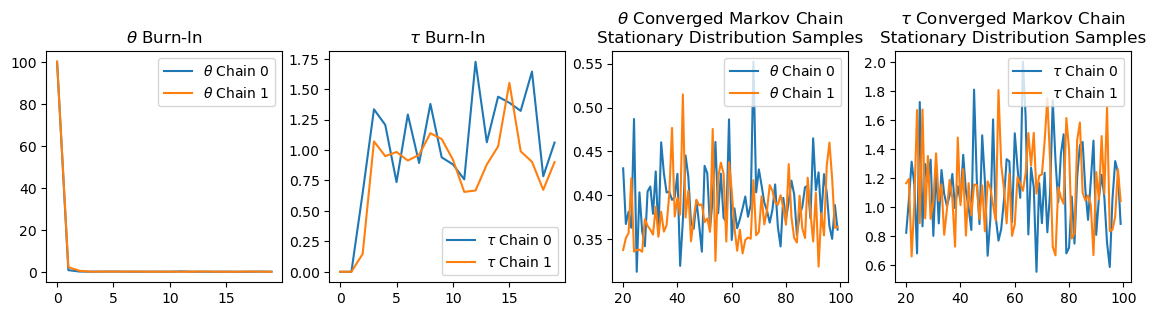

In [23]:
fig,ax = plt.subplots(1, 4, figsize=(14,3)); ax[0].set_title("$\\theta$ Burn-In"); ax[1].set_title("$\\tau$ Burn-In"); ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples"); ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")
burn = 20
demo = 100
for c in range(C):
    ax[0].plot(theta[c,:burn], label="$\\theta$ Chain "+str(c))
    ax[1].plot(tau[c,:burn], label="$\\tau$ Chain "+str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c,burn:demo], label="$\\theta$ Chain "+str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c,burn:demo], label="$\\tau$ Chain "+str(c))
ax[0].legend(); ax[1].legend(); ax[2].legend(); ax[3].legend();         

We can observe that $\theta$ does converge to 0 as implied in the distribution for x where mean = 0. $\tau$ seems to converge to around 1. All in all, from the Markov chains also we can see that there is some steady-state reached i.e convergence reached when it comes to our parameters of interest. 

## Q3

if the prior is a proper distribution then the posterior is proportional to the joint distribution. If the joint distribution resembles the form of a standard probabilty density function, it can be assumed to have the same functional form. However, Bayesians are less concerned about functional form and more about drawing samples from those distributions. This helps construct a histogram for the parameter and determine the credible interval.